Sample Data:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Dataset Shape: (5572, 2)

Label Counts:
 label
ham     4825
spam     747
Name: count, dtype: int64

✅ Model Accuracy: 99.19 %

✅ Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



C:\Users\91789\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


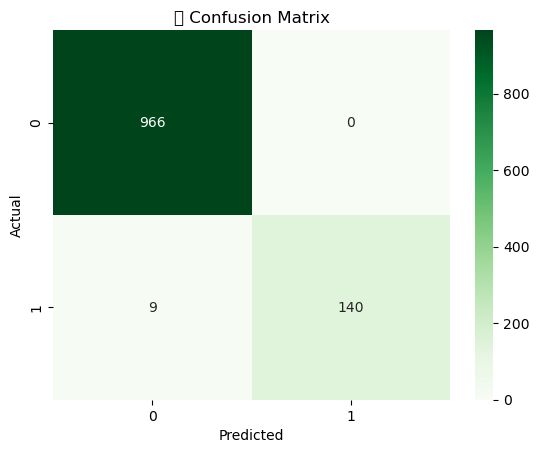


✅ Custom Message Predictions:
'You won a lottery of $5000!' => Spam
'Hey bro, are we still meeting tomorrow?' => Ham


In [1]:
# 📘 Task 4: Predictive Machine Learning Model - Spam Email Classifier
# 🎓 Internship: Python Programming - CodTech IT Solutions
# 👨‍💻 By: satish yadav

# ✅ Step 1: Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ✅ Step 2: Load the SMS Spam Dataset (from online URL)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', names=["label", "message"])

# ✅ Step 3: Basic Exploration
print("Sample Data:")
print(df.head())

print("\nDataset Shape:", df.shape)
print("\nLabel Counts:\n", df['label'].value_counts())

# ✅ Step 4: Convert text labels (ham/spam) into numbers (0/1)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# ✅ Step 5: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)

# ✅ Step 6: Convert Text into Vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ✅ Step 7: Train a Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# ✅ Step 8: Make Predictions on Test Data
y_pred = model.predict(X_test_vec)

# ✅ Step 9: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("\n✅ Model Accuracy:", round(accuracy * 100, 2), "%")

print("\n✅ Classification Report:\n")
print(classification_report(y_test, y_pred))

# ✅ Step 10: Visualize Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title("📊 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Step 11: Predict Custom Messages
custom_messages = ["You won a lottery of $5000!", "Hey bro, are we still meeting tomorrow?"]
custom_vec = vectorizer.transform(custom_messages)
custom_pred = model.predict(custom_vec)

print("\n✅ Custom Message Predictions:")
for msg, pred in zip(custom_messages, custom_pred):
    print(f"'{msg}' => {'Spam' if pred else 'Ham'}")
